In [1]:
import numpy as np
import pyhht as hht
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/Users/jaidevd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


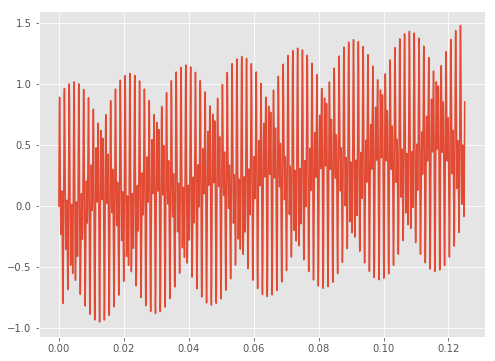

In [2]:
Fs = 32768
duration = 0.125
t = np.linspace(0, duration, duration * Fs)
f1, f2 = 697, 1336
y1 = np.sin(2 * np.pi * f1 * t);
y2 = np.sin(2 * np.pi * f2 * t);
y = (y1 + y2) / 2
y += np.linspace(0, 0.5, t.shape[0])
plt.figure(figsize=(8, 6))
plt.plot(t, y)

In [3]:
emd = hht.EMD(y, nbsym=4)
imfs = emd.decompose()

In [4]:
imf1 = imfs[0, :]
imf2 = imfs[1, :]

In [5]:
h1 = sp.signal.hilbert(imf1)
h2 = sp.signal.hilbert(imf2)

In [6]:
phase1 = sp.angle(h1)
phase2 = sp.angle(h2)
a1 = np.abs(h1)
a2 = np.abs(h2)

In [7]:
p1 = sp.unwrap(phase1)
p2 = sp.unwrap(phase2)

(<matplotlib.axes._subplots.AxesSubplot at 0x111505b38>,
 [<matplotlib.lines.Line2D at 0x1117f81d0>])

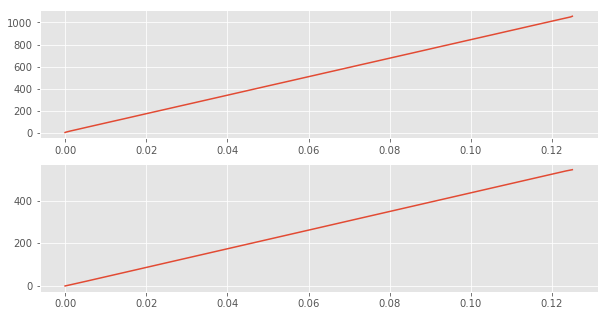

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(311), plt.plot(t, p1)
plt.subplot(312), plt.plot(t, p2)

(<matplotlib.axes._subplots.AxesSubplot at 0x114dfc518>,
 [<matplotlib.lines.Line2D at 0x114eaf748>])

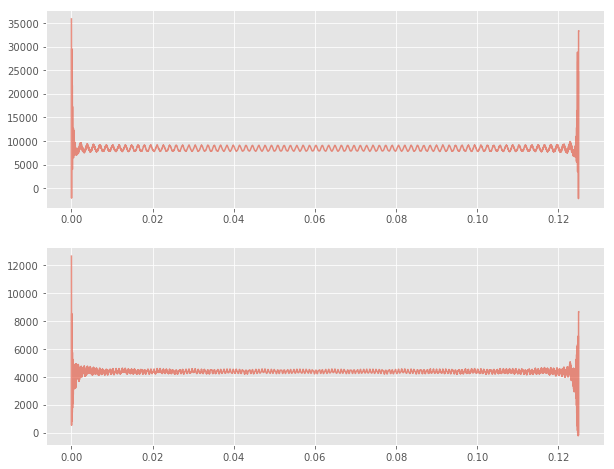

In [10]:
if1 = np.zeros(p1.shape)
if1[:-1] = np.diff(p1) / np.diff(t)
if1[-1] = (p1[-1] - p1[-2]) / (t[-1] - t[-2])
if2 = np.zeros(p2.shape)
if2[:-1] = np.diff(p2) / np.diff(t)
if2[-1] = (p2[-1] - p2[-2]) / (t[-1] - t[-2])
plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(t, if1, alpha=0.6)
plt.subplot(212), plt.plot(t, if2, alpha=0.6)

In [88]:
B = 2
K = 128

In [89]:
if1_hist, if1_edges = np.histogram(if1, bins=K)
if2_hist, if2_edges = np.histogram(if2, bins=K)

In [90]:
w1 = np.zeros((K, if1.shape[0]))
w2 = np.zeros((K, if2.shape[0]))

In [91]:
for i in range(K):
    start, stop = if1_edges[i], if1_edges[i + 1]
    w1[i, np.logical_and(if1 >= start, if1 <= stop)] = 1
    start, stop = if2_edges[i], if2_edges[i + 1]
    w2[i, np.logical_and(if2 >= start, if2 <= stop)] = 1

In [92]:
TFR1 = a1 * w1
TFR2 = a2 * w2

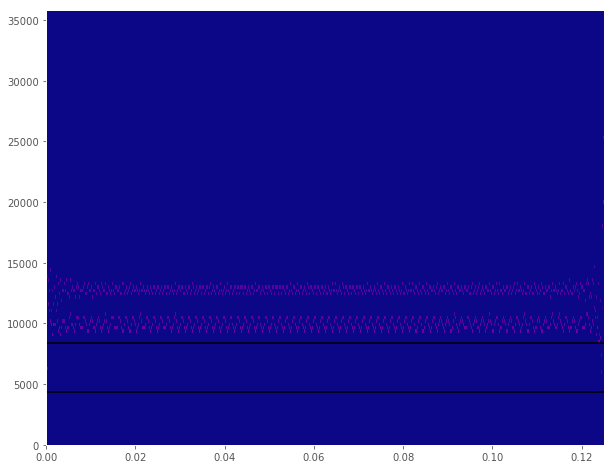

In [131]:
plt.figure(figsize=(10, 8))
plt.imshow(TFR1 + TFR2, interpolation="nearest", aspect="auto", 
           cmap=plt.cm.plasma, origin="bottomleft",
           extent=[t[0], t[-1], 0, if1_edges.max()])
plt.hlines([2 * np.pi * f1, 2 * np.pi * f2], 0, t[-1])
plt.grid(False)

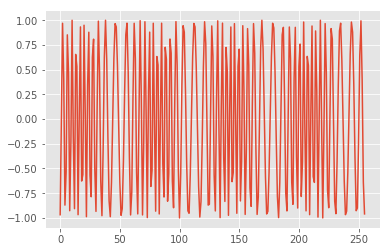

In [132]:
from tftb.generators import fmsin
sig, iflaw = fmsin(256, 0.1, 0.3, period=64)
plt.plot(np.real(sig))

In [134]:
xsig = np.real(sig)

In [136]:
emd = hht.EMD(xsig)

In [137]:
imfs = emd.decompose()

In [140]:
imfs.shape

(6, 256)

2
3
4
5
6


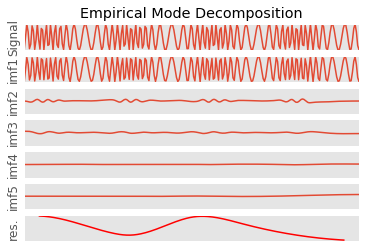

In [142]:
hht.visualization.plot_imfs(xsig, imfs)

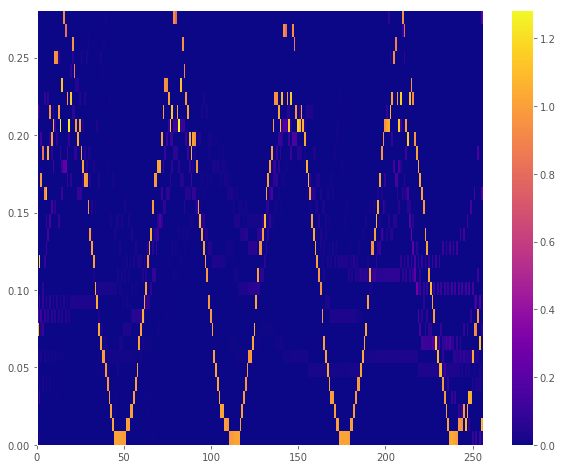

In [159]:
B = 5
K = 32
TFR = np.zeros((K, xsig.shape[0]))
t = np.arange(xsig.shape[0])
for imf in imfs[:-1, :]:
    h1 = sp.signal.hilbert(imf)
    phase = sp.angle(h1)
    a1 = np.abs(h1)
    p1 = sp.unwrap(phase)
    if1 = np.zeros(p1.shape)
    if1[:-1] = np.diff(p1) / np.diff(t)
    if1[-1] = (p1[-1] - p1[-2]) / (t[-1] - t[-2])
    if1_hist, if1_edges = np.histogram(if1, bins=K)
    w1 = np.zeros(TFR.shape)
    for i in range(K):
        start, stop = if1_edges[i], if1_edges[i + 1]
        w1[i, np.logical_and(if1 >= start, if1 <= stop)] = 1
    TFR += a1 * w1
plt.figure(figsize=(10, 8))
plt.imshow(TFR, interpolation="nearest", aspect="auto", 
           cmap=plt.cm.plasma, origin="bottomleft",
           extent=[0, xsig.shape[0], 0, if1_edges.max()])
plt.grid(False)
plt.colorbar()